In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col = 0).copy()
df.head()

/Users/chaoalex/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [3]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [4]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
df.head()
# your code here

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


Now check to see how large our subset df.

In [6]:
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [7]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [8]:
df.isna().sum()
#your code here

_STATE          0
FMONTH          0
IDATE           0
IMONTH          0
IDAY            0
            ...  
_RFSEAT2        0
_RFSEAT3        0
_FLSHOT6    22334
_PNEUMO2    22334
_AIDTST3     3773
Length: 358, dtype: int64

In [9]:
df['_AIDTST3'].value_counts()

2.0    18574
1.0    11272
9.0      926
Name: _AIDTST3, dtype: int64

In [10]:
df['_AIDTST3'].unique()

array([ 1.,  2., nan,  9.])

In [11]:
df = df.drop(['CNCRDIFF','CNCRAGE','CNCRTYP1','LCSLAST','RDUCHART','LCSNUMCG','CAREGIV1','FIREARM4','GUNLOAD','LOADULK2','ASTHMAGE','ARTHEDU','ARTHEXER','ARTHWGT','ARTTODAY','SDHSTRES','BPHI2MR','BPEXRADV','BPALCADV','BPSLTADV','BPEATADV','BPEXER','BPALCHOL','BPSALT','BPEATHBT','ASATTACK','SDHMONEY','SDHMEALS','SDHFOOD','CRGVREL2','CRGVLNG1','CRGVHRS1','CRGVPRB2','CRGVPERS','CRGVHOUS','CRGVMST2','CRGVEXPT','CIMEMLOS','CDHOUSE','CDASSIST','CDHELP','CDSOCIAL','CDDISCUS','EMTSUPRT','LSATISFY','SDHBILLS','SDHMOVE','HOWSAFE1','LCSCTSCN','BPMEDADV'] ,axis = 1)  


df.isna().sum()

_STATE          0
FMONTH          0
IDATE           0
IMONTH          0
IDAY            0
            ...  
_RFSEAT2        0
_RFSEAT3        0
_FLSHOT6    22334
_PNEUMO2    22334
_AIDTST3     3773
Length: 308, dtype: int64

In [12]:
df = df.drop(['COPDSMOK','HPVADVC2','IMFVPLAC','RSNMRJNA','USEMRJN1','MARIJANA','DRADVISE','WTCHSALT','SSBFRUT3','SSBSUGR2','CSRVPAIN','HPVADSHT','CSRVCLIN','CSRVDEIN','CSRVINSR','CSRVINST','CSRVRTRN','CSRVSUM','CSRVDOC1','CSRVTRT2','SLEPBRTH','CSRVCTL1','TETANUS','LCSFIRST','COPDCOGH','HAREHAB1','STREHAB1','CVDASPRN','COPDBRTH','ASPUNSAF','RLIVPAIN','RDUCSTRK','ASERVIST','ASDRVIST','ASRCHKUP','ASACTLIM','ASYMPTOM','ASNOSLEP','ASTHMED3','ASINHALR','PAINACT2','QLMENTL2','QLSTRES2','COPDFLEM','SLEPTIM1','ADSLEEP','SLEPDAY1','SLEPSNO2','COPDBTST','QLHLTH2'], axis =1)
df.isna().sum()

_STATE          0
FMONTH          0
IDATE           0
IMONTH          0
IDAY            0
            ...  
_RFSEAT2        0
_RFSEAT3        0
_FLSHOT6    22334
_PNEUMO2    22334
_AIDTST3     3773
Length: 258, dtype: int64

In [13]:
df = df.drop(['CARERCVD','DRVISITS','MEDSCOS1','DELAYMED','HIVTSTD3','JOINPAI1','ARTHSOCL','ARTHDIS2','LMTJOIN3','MEDICARE','NOCOV121','HLTHCVR1','PDIABTST','PREDIAB1','LASTSMK2','ASBIALCH','ASBIDRNK','ASBIBING','ASBIADVC','ASBIRDUC','PREGNANT','_CPRACE','_CRACE1','PFPPRVN2','ASTHNOW','_CLLCPWT','RCSGENDR','RCSRLTN2','CASTHDX2','DIABAGE2','ECIGNOW','STOPSMK2','TYPCNTR7','NOBCUSE6','DIABEYE','INSULIN','BLDSUGAR','FEETCHK2','DOCTDIAB','CHKHEMO3','EYEEXAM','DIABEDU','FEETCHK','NUMPHON2','LSTCOVRG','CASTHNO2','DLYOTHER','CCLGHOUS','COLGHOUS','LADULT'] , axis=1)
df.isna().sum()


_STATE          0
FMONTH          0
IDATE           0
IMONTH          0
IDAY            0
            ...  
_RFSEAT2        0
_RFSEAT3        0
_FLSHOT6    22334
_PNEUMO2    22334
_AIDTST3     3773
Length: 208, dtype: int64

In [14]:
df['_AIDTST3'] = df['_AIDTST3'].fillna(value=df['_AIDTST3'].median)
df.isna().sum()

_STATE          0
FMONTH          0
IDATE           0
IMONTH          0
IDAY            0
            ...  
_RFSEAT2        0
_RFSEAT3        0
_FLSHOT6    22334
_PNEUMO2    22334
_AIDTST3        0
Length: 208, dtype: int64

In [15]:
df.isna().sum().sort_values().tail(110)

HLTHPLN1        0
PERSDOC2        0
MEDCOST         0
_PSU            0
CHILDREN        0
            ...  
CHOLMED1    22126
_PNEUMO2    22334
_FLSHOT6    22334
HHADULT     22612
MEDBILL1    23191
Length: 110, dtype: int64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [16]:
df[('PHYSHLTH')].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

In [17]:
df[('PHYSHLTH')].value_counts()
df[('PHYSHLTH')] = df[('PHYSHLTH')].replace(to_replace =88, value =0) 
df[('PHYSHLTH')] = df[('PHYSHLTH')].replace(to_replace =77, value =0) 
df[('PHYSHLTH')] = df[('PHYSHLTH')].replace(to_replace =99, value =0) 
core = df[('PHYSHLTH')]
core.describe()

count    34545.000000
mean         3.990968
std          8.436737
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

Text(0, 0.5, 'Num of people')

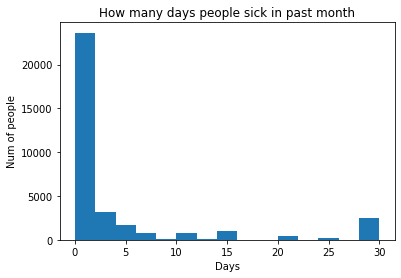

In [18]:
PHYSHLTH_mean = df['PHYSHLTH'].mean()
PHYSHLTH_median = df['PHYSHLTH'].median()
PHYSHLTH_std = df['PHYSHLTH'].std()
df['PHYSHLTH'].plot(kind='hist', bins=15, title='How many days people sick in past month')
plt.xlabel('Days')
plt.ylabel('Num of people')

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [19]:
new_df = df[['PHYSHLTH','_STATE']].reset_index()
new_df['_STATE'].value_counts()

36.0    12249
34.0    11708
9.0     10588
Name: _STATE, dtype: int64

In [20]:
phy=pd.DataFrame(new_df.groupby('_STATE')['PHYSHLTH'].mean()).reset_index()
phy

,_STATE,PHYSHLTH
0,9.0,3.627597
1,34.0,4.287410
2,36.0,4.021716


Text(0, 0.5, 'num of days')

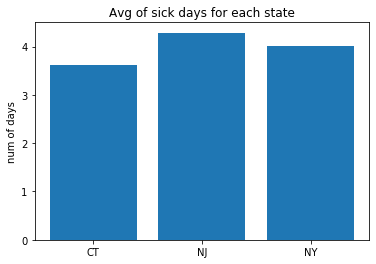

In [21]:
plt.bar(['CT','NJ','NY'],phy['PHYSHLTH'])
plt.title('Avg of sick days for each state')
plt.ylabel("num of days")

In [22]:
# code to graph those averages using matplotlib

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [23]:
sickness_type=df[['CVDINFR4','CVDCRHD4','CVDSTRK3','CHCSCNCR','ASTHMA3','CHCOCNCR','CHCCOPD1','ADDEPEV2','DIABETE3','CHCKIDNY']]
sickness_type

,CVDINFR4,CVDCRHD4,CVDSTRK3,CHCSCNCR,ASTHMA3,CHCOCNCR,CHCCOPD1,ADDEPEV2,DIABETE3,CHCKIDNY
49938,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0
49939,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
49940,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
49941,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
49942,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...
303774,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0
303775,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
303776,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
303777,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0


In [24]:
# df[('CVDINFR4')] = df[('CVDINFR4')].replace(to_replace =2.0, value =0) 
# df[('CVDINFR4')] = df[('CVDINFR4')].replace(to_replace =3.0, value =0) 
# sickness_type
a=[]
for col in list(sickness_type.columns):
     a.append(sickness_type[col].apply(lambda x : 0 if x!=1 else 1))
pd.DataFrame(a)
        

,49938,49939,49940,49941,49942,49943,49944,49945,49946,49947,...,303769,303770,303771,303772,303773,303774,303775,303776,303777,303778
CVDINFR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVDCRHD4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
CVDSTRK3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHCSCNCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASTHMA3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHCOCNCR,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CHCCOPD1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ADDEPEV2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
DIABETE3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHCKIDNY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
ct=pd.DataFrame(pd.DataFrame(a).sum(axis=1)).reset_index()
ct

,index,0
0,CVDINFR4,1724
1,CVDCRHD4,1755
2,CVDSTRK3,1196
3,CHCSCNCR,2808
4,ASTHMA3,4801
5,CHCOCNCR,3373
6,CHCCOPD1,2566
7,ADDEPEV2,5905
8,DIABETE3,4361
9,CHCKIDNY,1172


In [26]:
ct.columns=['type','sum']
ct

,type,sum
0,CVDINFR4,1724
1,CVDCRHD4,1755
2,CVDSTRK3,1196
3,CHCSCNCR,2808
4,ASTHMA3,4801
5,CHCOCNCR,3373
6,CHCCOPD1,2566
7,ADDEPEV2,5905
8,DIABETE3,4361
9,CHCKIDNY,1172


Text(0, 0.5, 'num of people')

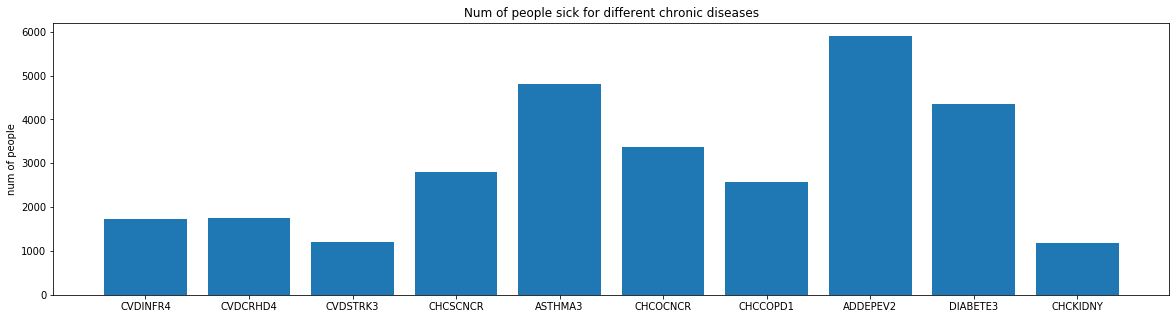

In [27]:
plt.figure(figsize=(20,5))
plt.bar(ct['type'],ct['sum'])
plt.title('Num of people sick for different chronic diseases')
plt.ylabel("num of people")

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [28]:
new_df2 = df[['PHYSHLTH','_STATE']].reset_index()
m=pd.DataFrame(new_df2['_STATE'].value_counts(normalize=True)).reset_index()
m.columns=['state','percentage']
m['state']=m['state'].map({36.0:'NY',34.0:'NJ',9.0:'CT'})
m

,state,percentage
0,NY,0.354581
1,NJ,0.338920
2,CT,0.306499


Text(0, 0.5, 'percentage')

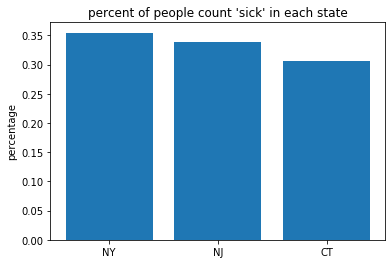

In [29]:
plt.bar(m['state'],m['percentage'])
plt.title("percent of people count 'sick' in each state")
plt.ylabel("percentage")

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [30]:
new_raw = pd.DataFrame(df[['_STATE','SMOKDAY2']]).reset_index().drop(columns="index")
new_raw.head()
new_raw['SMOKDAY2']=new_raw['SMOKDAY2'].apply(lambda x: 1 if (x==1.0 or x==2.0) else 0)

In [31]:
new_raw

,_STATE,SMOKDAY2
0,9.0,0
1,9.0,0
2,9.0,0
3,9.0,0
4,9.0,0
...,...,...
34540,36.0,1
34541,36.0,0
34542,36.0,0
34543,36.0,0


In [32]:
new_raw['_STATE']=new_raw['_STATE'].map({36.0:'NY',34.0:'NJ',9.0:'CT'})

In [33]:
new_raw

,_STATE,SMOKDAY2
0,CT,0
1,CT,0
2,CT,0
3,CT,0
4,CT,0
...,...,...
34540,NY,1
34541,NY,0
34542,NY,0
34543,NY,0


In [34]:
bar=pd.DataFrame(new_raw.groupby('_STATE')['SMOKDAY2'].sum()).reset_index()
bar

,_STATE,SMOKDAY2
0,CT,1064
1,NJ,1411
2,NY,1572


Text(0, 0.5, 'num of people')

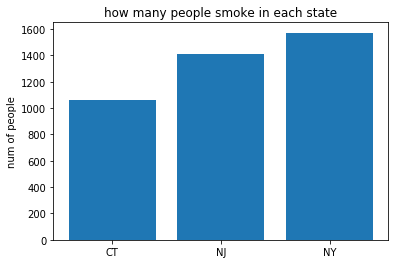

In [35]:
plt.bar('_STATE','SMOKDAY2',data=bar)
plt.title("how many people smoke in each state")
plt.ylabel('num of people')

In [36]:
new = df['SMOKDAY2'].reset_index().drop(columns='index')
new

,SMOKDAY2
0,NaN
1,NaN
2,NaN
3,NaN
4,3.0
...,...
34540,1.0
34541,NaN
34542,3.0
34543,NaN


In [37]:
new.shape

(34545, 1)

In [38]:
new.info

<bound method DataFrame.info of        SMOKDAY2
0           NaN
1           NaN
2           NaN
3           NaN
4           3.0
...         ...
34540       1.0
34541       NaN
34542       3.0
34543       NaN
34544       NaN

[34545 rows x 1 columns]>

In [39]:
new.isna().sum().sort_values()

SMOKDAY2    20762
dtype: int64

In [40]:
b=[]
for col in new.columns:
     b.append(new[col].apply(lambda x : 0 if x!=1 else 1))
pd.DataFrame(b)
       

,0,1,2,3,4,5,6,7,8,9,...,34535,34536,34537,34538,34539,34540,34541,34542,34543,34544
SMOKDAY2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
pd.DataFrame(b).T.describe()
xx=pd.DataFrame(b).T

Text(0, 0.5, 'Num of people')

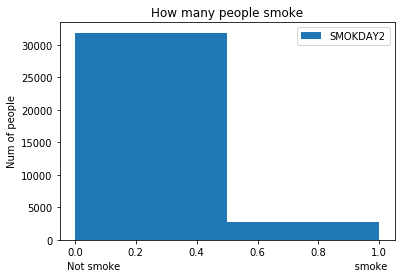

In [42]:
xx.plot(kind='hist', bins=2, title='How many people smoke')
plt.xlabel('Not smoke                                                                           smoke')
plt.ylabel('Num of people')

In [43]:
new_new_raw = pd.DataFrame(df[['PHYSHLTH','SMOKDAY2']]).reset_index().drop(columns="index")
new_new_raw['SMOKDAY2']=new_new_raw['SMOKDAY2'].apply(lambda x: 1 if (x==1.0 or x==2.0) else 0)
new_new_raw.head()

,PHYSHLTH,SMOKDAY2
0,0.0,0
1,0.0,0
2,2.0,0
3,0.0,0
4,0.0,0


In [44]:
bar=pd.DataFrame(new_new_raw.groupby('PHYSHLTH')['SMOKDAY2'].sum()).reset_index()
bar.head()

,PHYSHLTH,SMOKDAY2
0,0.0,2254
1,1.0,142
2,2.0,202
3,3.0,149
4,4.0,75


Text(0, 0.5, 'num of people')

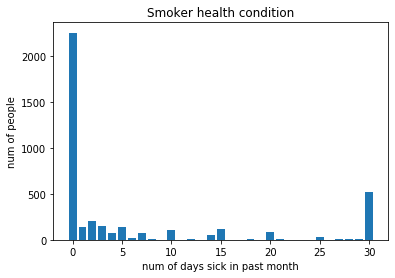

In [45]:
plt.bar('PHYSHLTH','SMOKDAY2',data=bar)
plt.title("Smoker health condition")
plt.xlabel('num of days sick in past month')
plt.ylabel('num of people')

In [46]:
500/(2300+500)

0.17857142857142858

In [47]:
no_new_raw = pd.DataFrame(df[['PHYSHLTH','SMOKDAY2']]).reset_index().drop(columns="index")
no_new_raw['SMOKDAY2']=new_new_raw['SMOKDAY2'].apply(lambda x: 1 if (x!=1.0 or x!=2.0) else 0)
no_new_raw.head()

,PHYSHLTH,SMOKDAY2
0,0.0,1
1,0.0,1
2,2.0,1
3,0.0,1
4,0.0,1


In [48]:
bar2=pd.DataFrame(no_new_raw.groupby('PHYSHLTH')['SMOKDAY2'].sum()).reset_index()
bar2.head()

,PHYSHLTH,SMOKDAY2
0,0.0,22094
1,1.0,1538
2,2.0,1993
3,3.0,1187
4,4.0,622


Text(0, 0.5, 'num of people')

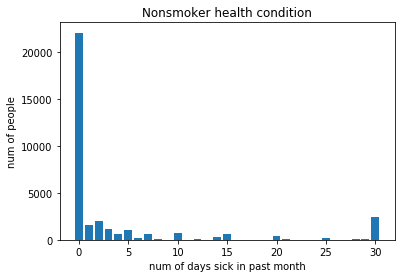

In [49]:
plt.bar('PHYSHLTH','SMOKDAY2',data=bar2)
plt.title("Nonsmoker health condition")
plt.xlabel('num of days sick in past month')
plt.ylabel('num of people')

In [50]:
2000/(23000+2000)

0.08

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [51]:
df['ALCDAY5'].head()

49938    101.0
49939    230.0
49940    888.0
49941    103.0
49942    101.0
Name: ALCDAY5, dtype: float64

In [52]:
df[('ALCDAY5')].value_counts()
df[('ALCDAY5')] = df[('ALCDAY5')].replace(to_replace =888, value =0) 
df[('ALCDAY5')] = df[('ALCDAY5')].replace(to_replace =777, value =0) 
df[('ALCDAY5')] = df[('ALCDAY5')].replace(to_replace =999, value =0) 
alcohol = pd.DataFrame(df[('ALCDAY5')])
alcohol.describe()

,ALCDAY5
count,32638.000000
mean,105.450181
std,95.496864
min,0.000000
25%,0.000000
50%,103.000000
75%,203.000000
max,230.000000


In [53]:
aa=[]
for col in list(alcohol.columns):
     aa.append(alcohol[col].apply(lambda x : x-200 if x > 200 else 0))
var=pd.DataFrame(pd.DataFrame(aa).transpose()['ALCDAY5'].value_counts()).reset_index()
var.columns=['drink_days','frequency']
var.head()

,drink_days,frequency
0,0.0,20543
1,1.0,3027
2,2.0,2324
3,3.0,1350
4,30.0,1164


Text(0, 0.5, 'num of people')

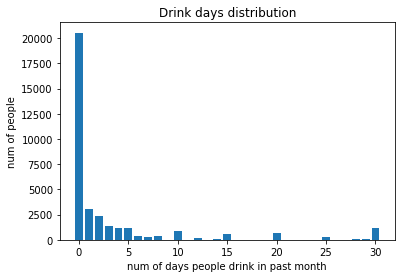

In [54]:
plt.bar('drink_days', 'frequency',data=var)
plt.title("Drink days distribution")
plt.xlabel('num of days people drink in past month')
plt.ylabel('num of people')

In [55]:
alc_state = pd.DataFrame(df[['_STATE','ALCDAY5']]).reset_index().drop(columns="index")
alc_state['ALCDAY5']=alc_state['ALCDAY5'].apply(lambda x:(x-100)*4 if (x>=101 and x<=107) else(x-200 if x>=200 and x<=230 else 0))
alc_state.head()

,_STATE,ALCDAY5
0,9.0,4.0
1,9.0,30.0
2,9.0,0.0
3,9.0,12.0
4,9.0,4.0


In [56]:
var2=pd.DataFrame(alc_state.groupby('_STATE')['ALCDAY5'].mean())
# var2['_STATE']=var2['_STATE'].map({36.0:'NY',34.0:'NJ',9.0:'CT'})
var2.head(5)

,ALCDAY5
_STATE,
9.0,5.609936
34.0,4.613854
36.0,4.667157


Text(0, 0.5, 'num of people')

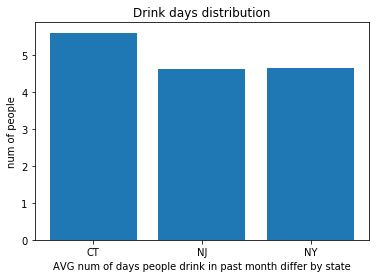

In [57]:
state_list=['CT','NJ','NY']
plt.bar(state_list, var2['ALCDAY5'])
plt.title("Drink days distribution")
plt.xlabel('AVG num of days people drink in past month differ by state')
plt.ylabel('num of people')

In [58]:
alc_state

,_STATE,ALCDAY5
0,9.0,4.0
1,9.0,30.0
2,9.0,0.0
3,9.0,12.0
4,9.0,4.0
...,...,...
34540,36.0,3.0
34541,36.0,0.0
34542,36.0,4.0
34543,36.0,0.0


In [59]:
alc_state2 = alc_state['ALCDAY5']
alc_state2

0         4.0
1        30.0
2         0.0
3        12.0
4         4.0
         ... 
34540     3.0
34541     0.0
34542     4.0
34543     0.0
34544    30.0
Name: ALCDAY5, Length: 34545, dtype: float64

In [60]:
x1=pd.DataFrame(alc_state2).reset_index()['ALCDAY5']
y=pd.DataFrame(core).reset_index()['PHYSHLTH']

In [61]:
import statsmodels.api as sm

x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

/Users/chaoalex/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PHYSHLTH   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     227.4
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           3.19e-51
Time:                        14:01:01   Log-Likelihood:            -1.2257e+05
No. Observations:               34545   AIC:                         2.452e+05
Df Residuals:                   34543   BIC:                         2.452e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4118      0.053     82.993      0.000       4.308       4.516
ALCDAY5       -0.0852      0.006    -15.080      0.000      -0.096      -0.074
==============================================================================
Omnibus:                    15145.105   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54583.331
Skew:                           2.310   Prob(JB):                         0.00
Kurtosis:                       7.073   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [63]:
 
X = x1.values.reshape(-1, 1)  
Y = y.values.reshape(-1, 1)  
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X) 


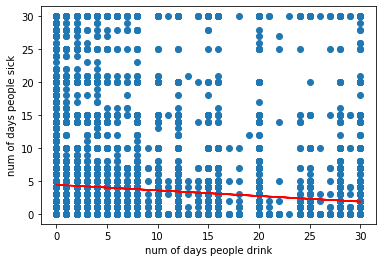

In [64]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('num of days people drink')
plt.ylabel('num of days people sick')
plt.show()

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [66]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  